## Evaluación del modelo

Describiendo los datos


FuelConsumption.csv,  contiene la clasificaciones de consumo de combustible específicas del modelo y emisiones estimadas de dióxido de carbono para vehículos livianos nuevos en el mercado Canadiense del año 2014 [Dataset](https://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64)

- **MODELYEAR** : Año del modelo, todos son del 2014
- **MAKE** : Marca del auto
- **MODEL** : Modelo
- **VEHICLE CLASS**  : Tipo de vehiculo
- **ENGINE SIZE** : Tamaño del motor (total del desplazamiento de todos los cilindros en litros)
- **CYLINDERS** : Número de cilindros
- **TRANSMISSION** : TIpo de transmisión
- **FUEL CONSUMPTION in CITY(L/100 km)** : Consumo de combustible en litros por km en la ciudad.
- **FUEL CONSUMPTION in HWY (L/100 km)** : Consumo de combustible en litros por km en la autopista.
- **FUEL CONSUMPTION COMB (L/100 km)** : Consumo de combustible en litros por km en ciudad  y autopista.
- **CO2 EMISSIONS (g/km)** : Emisiones de CO2 en gramos por kilometro 

Ref English : https://www.nrcan.gc.ca/energy-efficiency/transportation-alternative-fuels/personal-vehicles/choosing-right-vehicle/buying-electric-vehicle/understanding-the-tables/21383

In [103]:
'''
Curso : Análisis de Datos con Python
Fecha : 17/01/2026
'''

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [104]:
df = pd.read_csv('dataset/FuelConsumption.csv')
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [105]:
df.dtypes

MODELYEAR                     int64
MAKE                         object
MODEL                        object
VEHICLECLASS                 object
ENGINESIZE                  float64
CYLINDERS                     int64
TRANSMISSION                 object
FUELTYPE                     object
FUELCONSUMPTION_CITY        float64
FUELCONSUMPTION_HWY         float64
FUELCONSUMPTION_COMB        float64
FUELCONSUMPTION_COMB_MPG      int64
CO2EMISSIONS                  int64
dtype: object

In [106]:
df.isnull().sum()

MODELYEAR                   0
MAKE                        0
MODEL                       0
VEHICLECLASS                0
ENGINESIZE                  0
CYLINDERS                   0
TRANSMISSION                0
FUELTYPE                    0
FUELCONSUMPTION_CITY        0
FUELCONSUMPTION_HWY         0
FUELCONSUMPTION_COMB        0
FUELCONSUMPTION_COMB_MPG    0
CO2EMISSIONS                0
dtype: int64

In [107]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [108]:
df.describe(include=[object])

,MAKE,MODEL,VEHICLECLASS,TRANSMISSION,FUELTYPE
count,1067,1067,1067,1067,1067
unique,39,663,16,22,4
top,FORD,F150 FFV,MID-SIZE,A6,X
freq,90,8,178,222,514


In [109]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


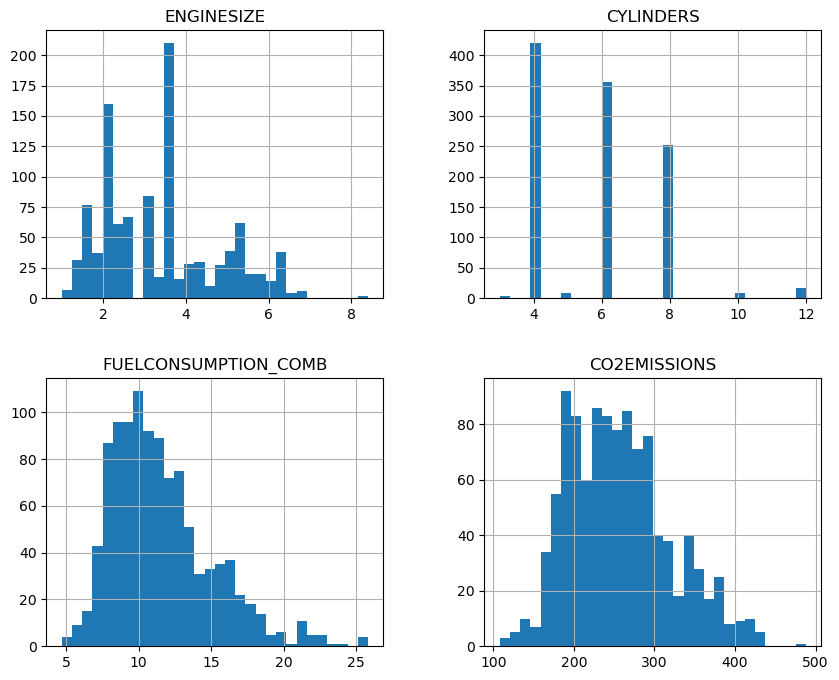

In [110]:
df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']].hist(bins=30, figsize=(10,8))
plt.show()

Generando diagramas de Regresión

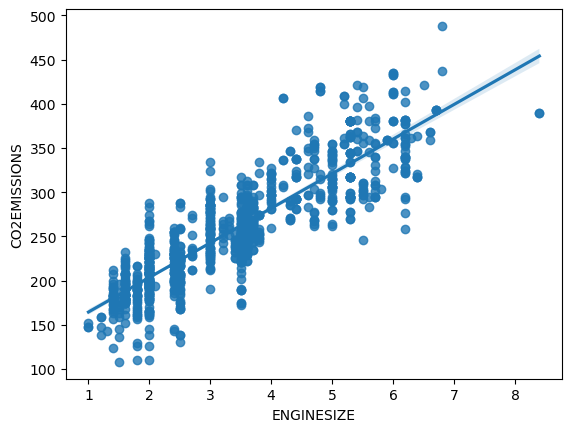

In [111]:
sns.regplot(x="ENGINESIZE", y="CO2EMISSIONS", data=cdf)
plt.show()

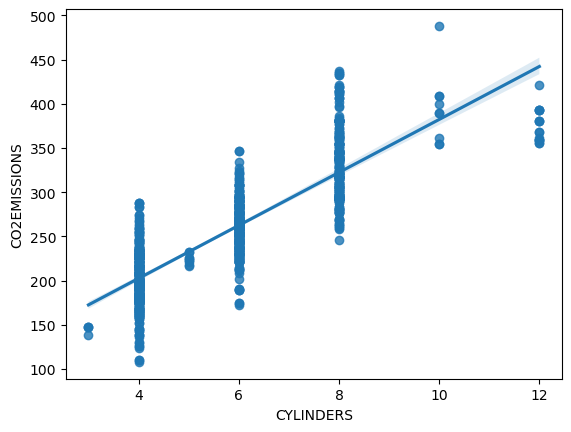

In [112]:
sns.regplot(x="CYLINDERS", y="CO2EMISSIONS", data=cdf)
plt.show()

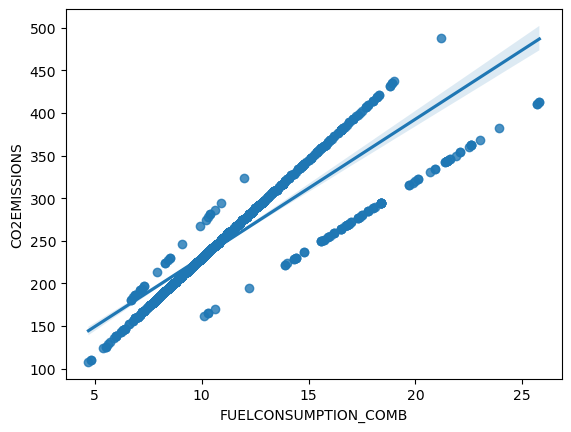

In [113]:
sns.regplot(x="FUELCONSUMPTION_COMB", y="CO2EMISSIONS", data=cdf  )   
plt.show()

### 3. Seleccionando variable independiente y dependiente y separando datos en entrenamiento y prueba


In [114]:
X = cdf[['ENGINESIZE']]
y = cdf['CO2EMISSIONS']

print("Tamaño de X:", X.shape)

Tamaño de X: (1067, 1)


In [115]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Tamaño de X_train:", X_train.shape)
print("Tamaño de X_test:", X_test.shape)
print("Tamaño de y_train:", y_train.shape)
print("Tamaño de y_test:", y_test.shape)

Tamaño de X_train: (853, 1)
Tamaño de X_test: (214, 1)
Tamaño de y_train: (853,)
Tamaño de y_test: (214,)


### 4.- Aplicando regresión simple, mostrando los coeficientes y escribiendo la ecuación


In [116]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train, y_train) 

print("Coeficiente:", lm.coef_)
print("Intercepción:", lm.intercept_)

Coeficiente: [38.99297872]
Intercepción: 126.28970217408764


$$ \hat{y} = 126.29 + 38.99x $$

### 4.-Calculando valores predichos, errores, graficando la ecuación y los residuos de los datos de entrenamiento


In [117]:
df_train = pd.concat([X_train, y_train], axis=1)


#### Graficamos el modelo

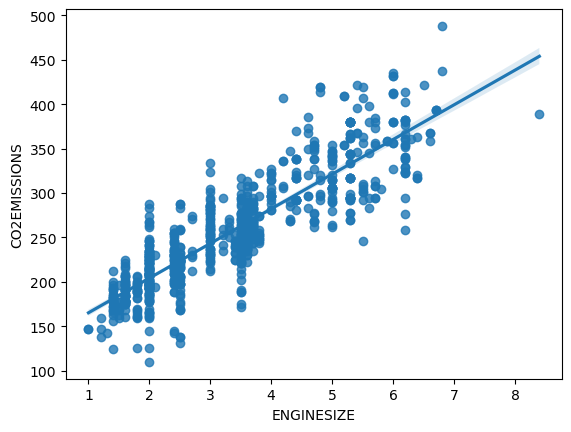

In [118]:
sns.regplot(x="ENGINESIZE", y="CO2EMISSIONS", data=df_train, fit_reg=True)
plt.show()

####  Graficamos los residuales

In [119]:
df_train["ERROR"] = y_train - lm.predict(X_train)
df_train["ERROR"].head()

333    -1.879872
106    -5.858809
585    23.731362
55     18.731362
213    47.047511
Name: ERROR, dtype: float64

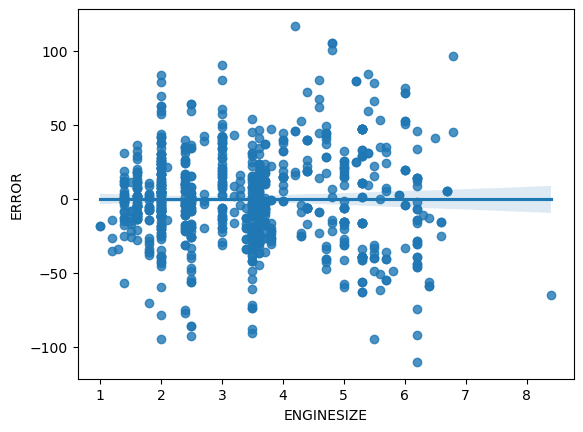

In [120]:
sns.regplot(x="ENGINESIZE", y="ERROR", data=df_train, fit_reg=True)
plt.show()

### 5.- Calculando valores predichos, errores, graficando la ecuación y los residuos de los datos de prueba


In [121]:
df_test = pd.concat([X_test, y_test], axis=1)


#### Graficamos el modelo

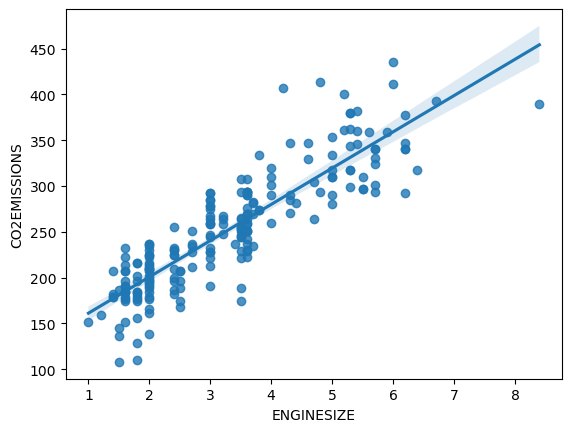

In [125]:
sns.regplot(x="ENGINESIZE", y="CO2EMISSIONS", data=df_test, fit_reg=True)
plt.show()

####  Graficamos los residuales

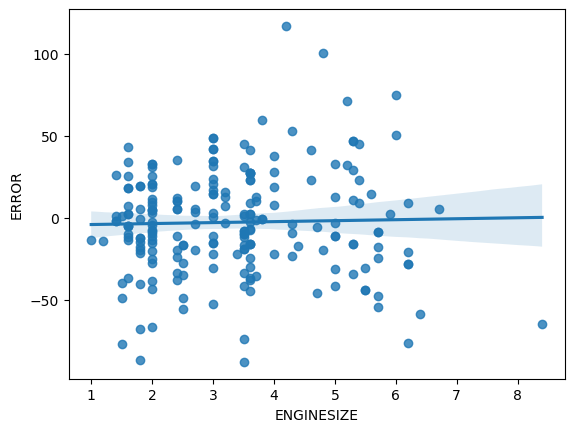

In [123]:
df_test["ERROR"] = y_test - lm.predict(X_test)
sns.regplot(x="ENGINESIZE", y="ERROR", data=df_test, fit_reg=True)
plt.show()

### 6.- Calculando MSE y R2 para modelo de regresion simple en los datos de entrenamiento y prueba


In [126]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_train_hat = lm.predict(X_train)
print("MAE train:", mean_absolute_error(y_train, y_train_hat))
print("MSE train:", mean_squared_error(y_train, y_train_hat))
print("R2 train:", r2_score(y_train, y_train_hat))

y_test_hat = lm.predict(X_test)
print("MAE test:", mean_absolute_error(y_test, y_test_hat))
print("MSE test:", mean_squared_error(y_test, y_test_hat))
print("R2 test:", r2_score(y_test, y_test_hat))

MAE train: 23.19873782395719
MSE train: 936.7860103082572
R2 train: 0.7644042001810549
MAE test: 24.097257411707844
MSE test: 985.9381692275001
R2 test: 0.7615595731934373


### 7.- Haciendo predicciones y calculando métrica para regresión simple mediante validación cruzada


In [128]:
X = cdf[['ENGINESIZE']]
y = cdf['CO2EMISSIONS']

model = LinearRegression()

### **Valización Cruzada**

Es muy útil para validar que el modelo de aprendizaje automático elegido es el correcto y ayuda a evitar el overfitting.


<img src="images/kfold.jpg" width="400"/>


Documentacion 
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html

In [ ]:
from sklearn.model_selection import cross_val_predict

y_cv_hat = cross_val_predict(model, X, y, cv=5)
y_cv_hat[0:5]

array([203.12764013, 218.65443035, 183.71915236, 261.35310346,
       261.35310346])

In [137]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X, y, cv=5, scoring='r2')
print("R2 scores for each fold:", scores)
print("Mean R2 score:", scores.mean())


R2 scores for each fold: [0.74334613 0.7838278  0.72801992 0.73032948 0.78636053]
Mean R2 score: 0.7543767707250393
